In [1]:
#pip install geopy

In [43]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import DBSCAN
#from sklearn.metrics.pairwise import pairwise_distances
#from geopy.distance import geodesic

pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
zip_lon_lat = pd.read_csv('../data/nj_zip-lon-lat.csv')
zip_lon_lat.rename(columns={"ZIP":"zip_code", "LAT":"latitude", "LNG":"longitude"},inplace=True)
zip_lon_lat.head()

,zip_code,latitude,longitude
0,7001,40.582316,-74.271506
1,7002,40.662338,-74.110275
2,7003,40.809128,-74.187155
3,7004,40.882508,-74.304593
4,7005,40.932771,-74.417304


def distance_in_meters(x, y):
    return geodesic((x[0], x[1]), (y[0], y[1])).m

distance_matrix = pairwise_distances(zip_lon_lat[["latitude","longitude"]], metric=distance_in_meters)


len(distance_matrix)
distance_matrix

dbscan = DBSCAN(metric='precomputed', eps=3, min_samples=10)
dbscan.fit(distance_matrix)

predictions = dbscan.labels_
predictions

In [103]:
#dbscan = DBSCAN(eps=2/6371., min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(zip_lon_lat[["latitude","longitude"]]))
dbscan = DBSCAN(eps=.055, min_samples=5)
predictions = dbscan.fit_predict(zip_lon_lat[["latitude","longitude"]])
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, -1,  0,  0, -1,  0, -1, -1,  1, -1, -1,  0,  0,
        0,  0, -1,  1, -1, -1,  1,  1,  1,  0,  0,  0, -1,  1,  0, -1, -1,
       -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1, -1,  2,  2, -1, -1, -1,  2, -1,  2, -1,  2,  2,  2,  2,  2,
        2, -1, -1,  2,  2

<Axes: xlabel='longitude', ylabel='latitude'>

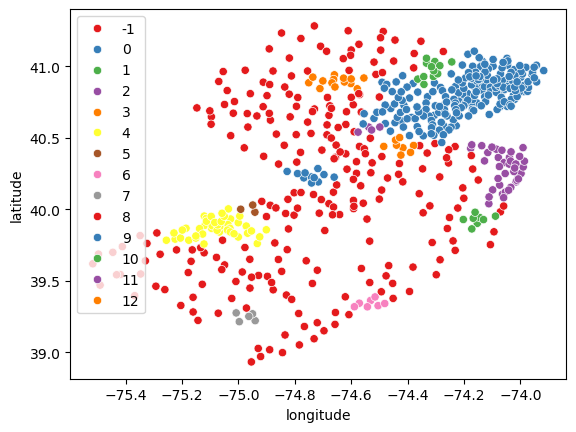

In [111]:
sns.scatterplot(data=zip_lon_lat[["latitude","longitude"]],x='longitude',y='latitude',hue=predictions,palette='Set1')

epsilons = np.arange(1,10,1)
n_clusters_list = []
for eps in epsilons:
    #db = DBSCAN(eps=eps).fit(zip_lon_lat[["zip_code"]])
    db = DBSCAN(eps=eps/6371., min_samples=5, algorithm='ball_tree', metric='haversine').fit(zip_lon_lat[["latitude","longitude"]])
    n_clusters = len(np.unique(db.labels_))
    n_clusters_list.append(n_clusters)

plt.plot(epsilons, n_clusters_list)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('How the Number of Clusters varies with eps');